In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
df = pd.read_csv('dataset/sonar.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### 데이터 전처리

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded = le.fit_transform(df.iloc[:,-1])
encoded = pd.DataFrame(encoded)
encoded.tail()

,0
203,0
204,0
205,0
206,0
207,0


In [13]:
df = df.iloc[:,:-1]

In [14]:
df = pd.concat([df,encoded], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,0
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((156, 60), (52, 60), (156,), (52,))

### 모델 정의/설정/학습/평가
- 30/24/1, 100 epochs

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [17]:
model = Sequential()
model.add(Dense(30, input_dim=60, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 24)                744       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,599
Trainable params: 2,599
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [19]:
history = model.fit(
    X_train, y_train, validation_split=0.2,
    epochs=100, batch_size=50, verbose=0
)

In [20]:
acc = model.evaluate(X_test, y_test)
print(f'정확도: {acc[1]:.4f}')

2/2 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8269
정확도: 0.8269


- 28/1 layers, rmsprop, 300 epochs

In [21]:
model2 = Sequential()
model2.add(Dense(28, input_dim=60, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 28)                1708      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 29        
Total params: 1,737
Trainable params: 1,737
Non-trainable params: 0
_________________________________________________________________


In [22]:
model2.compile(
    optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']
)

In [23]:
history2 = model2.fit(
    X_train, y_train, validation_split=0.2,
    epochs=300, batch_size=50, verbose=0
)

In [24]:
acc2 = model2.evaluate(X_test, y_test)
print(f'정확도: {acc2[1]:.4f}')

2/2 [==============================] - 0s 2ms/step - loss: 0.4559 - accuracy: 0.8462
정확도: 0.8462


- 48/24/8/1 layers, rmsprop, 200 epochs

In [25]:
model3 = Sequential()
model3.add(Dense(48, input_dim=60, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                2928      
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 200       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 4,313
Trainable params: 4,313
Non-trainable params: 0
_________________________________________________________________


In [26]:
model3.compile(
    optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']
)

In [27]:
history3 = model3.fit(
    X_train, y_train, validation_split=0.2,
    epochs=200, batch_size=50, verbose=1
)

l_accuracy: 0.8438
Epoch 59/200
3/3 [==============================] - 0s 6ms/step - loss: 0.2484 - accuracy: 0.9194 - val_loss: 0.3628 - val_accuracy: 0.8438
Epoch 60/200
3/3 [==============================] - 0s 6ms/step - loss: 0.2429 - accuracy: 0.9194 - val_loss: 0.3613 - val_accuracy: 0.8438
Epoch 61/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2358 - accuracy: 0.9194 - val_loss: 0.3422 - val_accuracy: 0.8438
Epoch 62/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2426 - accuracy: 0.8952 - val_loss: 0.3371 - val_accuracy: 0.8750
Epoch 63/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2391 - accuracy: 0.9274 - val_loss: 0.3497 - val_accuracy: 0.8750
Epoch 64/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2211 - accuracy: 0.9355 - val_loss: 0.3381 - val_accuracy: 0.8438
Epoch 65/200
3/3 [==============================] - 0s 5ms/step - loss: 0.2140 - accuracy: 0.9355 - val_loss: 0.3293 - val_accuracy: 0.8438
E

In [28]:
acc3 = model3.evaluate(X_test, y_test)
print(f'정확도: {acc3[1]:.4f}')

2/2 [==============================] - 0s 672us/step - loss: 0.8505 - accuracy: 0.7692
정확도: 0.7692


### 시각화

In [33]:
y_acc = history2.history['accuracy']
y_vloss = history2.history['val_loss']
x_len = np.arange(len(y_acc))

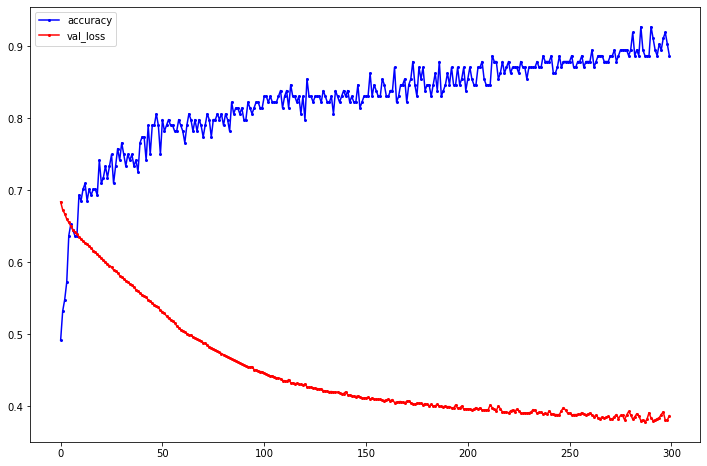

In [34]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()